## Tabular Playground Series - Aug 2022
* By Jackie Nguyen
* github:https://github.com/aznone5
* linkedin:https://www.linkedin.com/in/jackie-dan-nguyen/
* Kaggle Competition: https://www.kaggle.com/competitions/tabular-playground-series-aug-2022?rvi=1

## Objective
* 1. Change the train/test dataset to be clean of no null values and in numerical values
* 2. Create/Modify columns to give the best chance of making an accurate prediction
* 3. Graph correlations to the y_value "Failure" to the other columns of the train dataset,
* 4. Create a model "RandomForestRegressor" to learn and predict with the usage of "RandomSeachCV"

## Import 

In [676]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error

## Reading/Getting to know your dataset

In [677]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [716]:
train

In [679]:
test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [680]:
sample

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0
...,...,...
20770,47340,0.0
20771,47341,0.0
20772,47342,0.0
20773,47343,0.0


In [681]:
train.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [682]:
test.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

In [683]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [684]:
test.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [685]:
def handle_null_values(df):
    cols = [ 'loading', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',]
   

    imp = SimpleImputer(strategy='mean')
    
    
    df[cols] = pd.DataFrame(imp.fit_transform(df[cols]),columns=cols)
    
    return df

In [686]:
handle_null_values(train)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672000,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684000,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448000,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715000,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946000,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471000,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337000,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,11.430725,12.177,17.942000,10.112,15.795,18.572000,16.144,16.460727,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242000,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407000,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392000,17.064,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156,0


In [687]:
train.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

## Changing product_code to a number
* We will be changing the Product_code, (a-e) to a correspondent number (0-4)

In [688]:
def change_product_code(df):
    product_list = list(df.product_code.unique())
    alpha = dict(zip(product_list, range(len(product_list))))
    df.product_code = df.product_code.map(alpha)

In [689]:
change_product_code(train)

In [690]:
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.10,material_7,material_8,9,5,7,8,4,...,10.672000,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684000,764.100,0
1,1,0,84.89,material_7,material_8,9,5,14,3,3,...,12.448000,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057,0
2,2,0,82.43,material_7,material_8,9,5,12,1,5,...,12.715000,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946000,663.376,0
3,3,0,101.07,material_7,material_8,9,5,13,2,6,...,12.471000,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282,0
4,4,0,188.06,material_7,material_8,9,5,9,2,8,...,10.337000,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,4,158.95,material_7,material_6,6,9,6,16,4,...,11.430725,12.177,17.942000,10.112,15.795,18.572000,16.144,16.460727,729.131,0
26566,26566,4,146.02,material_7,material_6,6,9,10,12,8,...,11.242000,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924,0
26567,26567,4,115.62,material_7,material_6,6,9,1,10,1,...,11.407000,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364,0
26568,26568,4,106.38,material_7,material_6,6,9,2,9,4,...,11.392000,17.064,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156,0


## Remaking attribute_0, attribute_1 column
* Recreate the column to be a integer and removing the text from the column

In [691]:
def remove_material(df):
    df["attribute_0"] = df["attribute_0"].str.replace("material_", "")
    df["attribute_1"] = df["attribute_1"].str.replace("material_", "")
    df["attribute_0"] = df["attribute_0"].astype('int')
    df["attribute_1"] = df["attribute_1"].astype('int')

In [692]:
remove_material(train)

## New Columns
* We will be creating new columns "Total_attribute" and "Sum_measurement" to better predict on the model

In [693]:
def total_attribute(df):
    df["total_attribute"] = df["attribute_0"] + df["attribute_1"] + df["attribute_2"] + df["attribute_3"]

In [694]:
total_attribute(train)

In [695]:
train.total_attribute.unique()

array([29, 26, 28, 24], dtype=int64)

In [696]:
def sum_mesurement(df):
    columns_to_sum = ['measurement_0', 'measurement_1', 'measurement_2', 'measurement_3',
                      'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7',
                      'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 
                      'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15',
                      'measurement_16', 'measurement_17']
    df['sum_measurement'] = df[columns_to_sum].sum(axis=1)
    df['sum_measurement'] = df['sum_measurement'].round()

In [697]:
sum_mesurement(train)

In [698]:
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,total_attribute,sum_measurement
0,0,0,80.10,7,8,9,5,7,8,4,...,17.594000,15.193,15.029,16.048444,13.034,14.684000,764.100,0,29,999.0
1,1,0,84.89,7,8,9,5,14,3,3,...,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057,0,29,918.0
2,2,0,82.43,7,8,9,5,12,1,5,...,19.172085,13.798,16.711,18.631000,14.094,17.946000,663.376,0,29,906.0
3,3,0,101.07,7,8,9,5,13,2,6,...,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282,0,29,1066.0
4,4,0,188.06,7,8,9,5,9,2,8,...,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885,0,29,812.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,4,158.95,7,6,6,9,6,16,4,...,17.942000,10.112,15.795,18.572000,16.144,16.460727,729.131,0,28,967.0
26566,26566,4,146.02,7,6,6,9,10,12,8,...,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924,0,28,1096.0
26567,26567,4,115.62,7,6,6,9,1,10,1,...,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364,0,28,971.0
26568,26568,4,106.38,7,6,6,9,2,9,4,...,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156,0,28,960.0


## Graphs

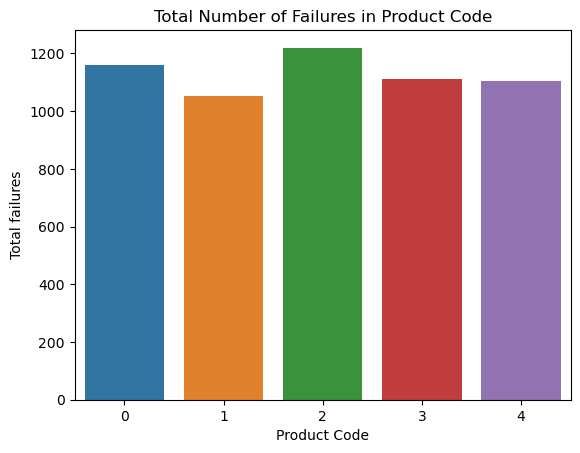

In [699]:
total = train.groupby('product_code')['failure'].sum().reset_index()
sns.barplot(x='product_code', y='failure', data=total)

plt.title('Total Number of Failures in Product Code')
plt.xlabel('Product Code')
plt.ylabel('Total failures')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

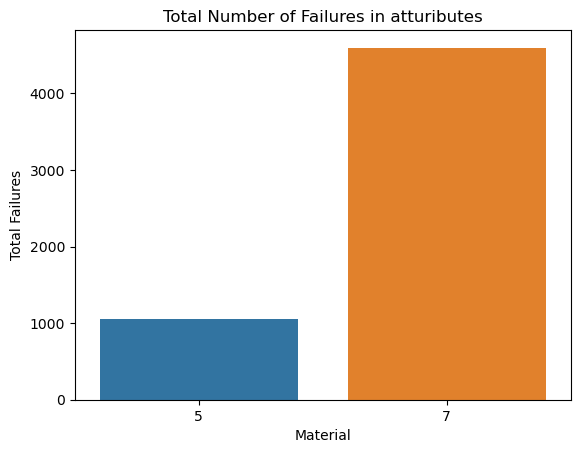

In [700]:
total = train.groupby('attribute_0')['failure'].sum().reset_index()
sns.barplot(x='attribute_0', y='failure', data=total)

plt.title('Total Number of Failures in attuributes')
plt.xlabel('Material')
plt.ylabel('Total Failures')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

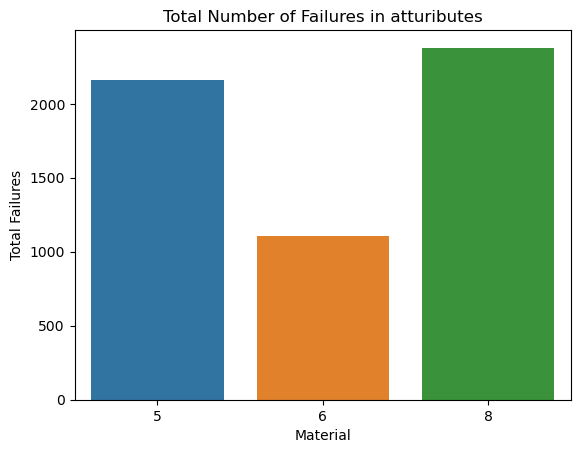

In [701]:
total = train.groupby('attribute_1')['failure'].sum().reset_index()
sns.barplot(x='attribute_1', y='failure', data=total)

plt.title('Total Number of Failures in attuributes')
plt.xlabel('Material')
plt.ylabel('Total Failures')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

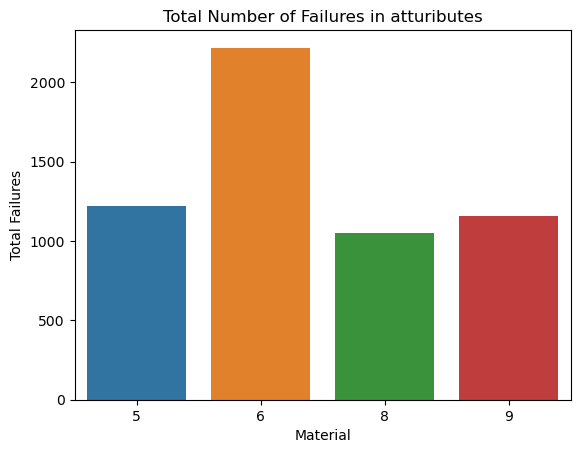

In [702]:
total = train.groupby('attribute_2')['failure'].sum().reset_index()
sns.barplot(x='attribute_2', y='failure', data=total)

plt.title('Total Number of Failures in attuributes')
plt.xlabel('Material')
plt.ylabel('Total Failures')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

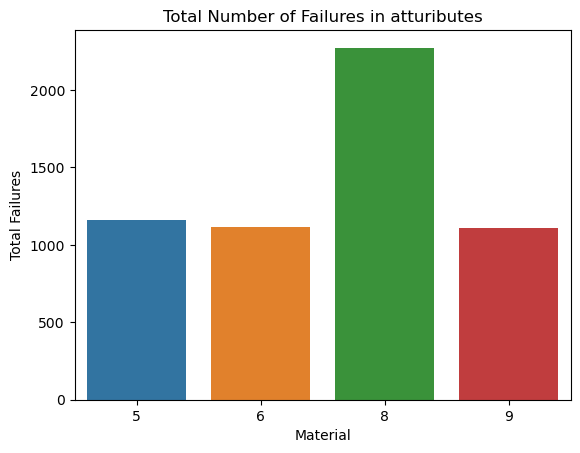

In [703]:
total = train.groupby('attribute_3')['failure'].sum().reset_index()
sns.barplot(x='attribute_3', y='failure', data=total)

plt.title('Total Number of Failures in attuributes')
plt.xlabel('Material')
plt.ylabel('Total Failures')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

## Model

In [706]:
X = train.drop("failure", axis = 1)
y = train['failure']

In [707]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("failure", axis = 1), train['failure'], test_size=0.2, random_state=42)


In [708]:
model = RandomForestRegressor()

param = {'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(5, 15),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
    }
         
random = RandomizedSearchCV(estimator = model,param_distributions = param,verbose=3,cv=5,n_iter=5)

random.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.012 total time=  14.9s
[CV 2/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.003 total time=  14.6s
[CV 3/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.008 total time=  15.4s
[CV 4/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.015 total time=  15.6s
[CV 5/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.004 total time=  14.9s


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.008 total time= 1.5min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.007 total time= 1.4min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.006 total time= 1.5min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.012 total time= 1.4min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.001 total time= 1.6min
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.012 total time=  23.6s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.008 total time=  23.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.012 total time=  22.6s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.014 total time=  22.7s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=0.008 total time=  23.8s
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.014 total time=   9.3s
[CV 2/5] END max_depth=6, max_features=lo

C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.006 total time= 3.5min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.009 total time= 3.6min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.003 total time= 3.3min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.009 total time= 3.2min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.000 total time= 3.2min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/5] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.001 total time= 1.1min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/5] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.016 total time= 1.1min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/5] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.001 total time= 1.1min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 4/5] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.008 total time= 1.1min


C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 5/5] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.021 total time= 1.1min
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.013 total time=  12.1s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.007 total time=  12.2s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.011 total time=  12.2s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.013 total time=  12.1s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.009 total time=  12.2s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=3)

In [711]:
best_rf_regressor = random.best_estimator_
best_params = random.best_params_
y_pred = best_rf_regressor.predict(X_test)

In [712]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Hyperparameters:", best_params)

NameError: name 'mean_squared_error' is not defined

In [718]:
handle_null_values(test)
change_product_code(test)
remove_material(test)
total_attribute(test)
sum_mesurement(test)
#drop_columns(test)


In [719]:
#model.fit(X_test, y_test)

In [720]:
y_pred = best_rf_regressor.predict(test)

In [721]:
y_pred_ = [round(pred, 6) for pred in y_pred]
y_pred = abs(y_pred)

In [722]:
submission_df = pd.DataFrame({'id': sample['id'], 'failure': y_pred})



submission_df.to_csv('submission.csv', index=False)

In [724]:
sample

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0
...,...,...
20770,47340,0.0
20771,47341,0.0
20772,47342,0.0
20773,47343,0.0


In [726]:
submission_df

,id,failure
0,26570,0.195062
1,26571,0.183947
2,26572,0.190712
3,26573,0.184901
4,26574,0.262188
...,...,...
20770,47340,0.218492
20771,47341,0.179022
20772,47342,0.200922
20773,47343,0.209466
